In [1]:
import cv2
import numpy as np
import os
from os.path import join
import matplotlib.pyplot as plt

In [2]:
label_def = {'axis': 7,
 'background': 14,
 'bearing': 6,
 'bearing_box_ax01/_ax16': 5,
 'container_box_blue': 10,
 'container_box_red': 11,
 'distance_tube': 8,
 'em_01': 12,
 'em_02': 13,
 'f20_20_B/s40_40_B': 0,
 'f20_20_G/s40_40_G': 1,
 'm20/m30': 3,
 'm20_100': 2,
 'motor': 9,
 'r20': 4}

In [3]:
LABEL_PATH = './ground_truth_combined'

cls_to_count = {key:0 for key in range(max(label_def.values())+1)}
image_to_cls_to_count = {}
sets = os.listdir(LABEL_PATH)

file_paths = list()
for s in sets:
    for file in os.listdir(join(LABEL_PATH, s)):
        file_paths.append(join(LABEL_PATH, s, file))
        image_to_cls_to_count[file] = cls_to_count.copy()

In [4]:
img_dimension = cv2.imread(file_paths[0], 0).shape

for path in file_paths:
    img = cv2.imread(path, 0)
    clses = np.unique(img)
    img_name = path.split('/')[-1]
    
    for cls in clses:      
        image_to_cls_to_count[img_name][cls] = np.shape(np.argwhere(img==cls))[0]
    
    if sum(image_to_cls_to_count[img_name].values()) != img.shape[0]*img.shape[1]:
        raise ValueError('Not all pixels have been counted...')

In [5]:
cls_to_percentage = {key:0 for key in label_def.keys()}

for count_dict in image_to_cls_to_count.values():
    for key in cls_to_percentage.keys():
        cls_to_percentage[key] += count_dict.get(label_def[key], 0)

total_pixels = img_dimension[0]*img_dimension[1]*len(file_paths)

cls_to_percentage = {key:round((value/total_pixels)*100, 2) for key, value in cls_to_percentage.items()}
cls_to_percentage

{'axis': 0.2,
 'background': 92.22,
 'bearing': 0.15,
 'bearing_box_ax01/_ax16': 0.69,
 'container_box_blue': 1.22,
 'container_box_red': 1.06,
 'distance_tube': 0.05,
 'em_01': 0.76,
 'em_02': 0.9,
 'f20_20_B/s40_40_B': 0.48,
 'f20_20_G/s40_40_G': 0.78,
 'm20/m30': 0.44,
 'm20_100': 0.31,
 'motor': 0.47,
 'r20': 0.26}

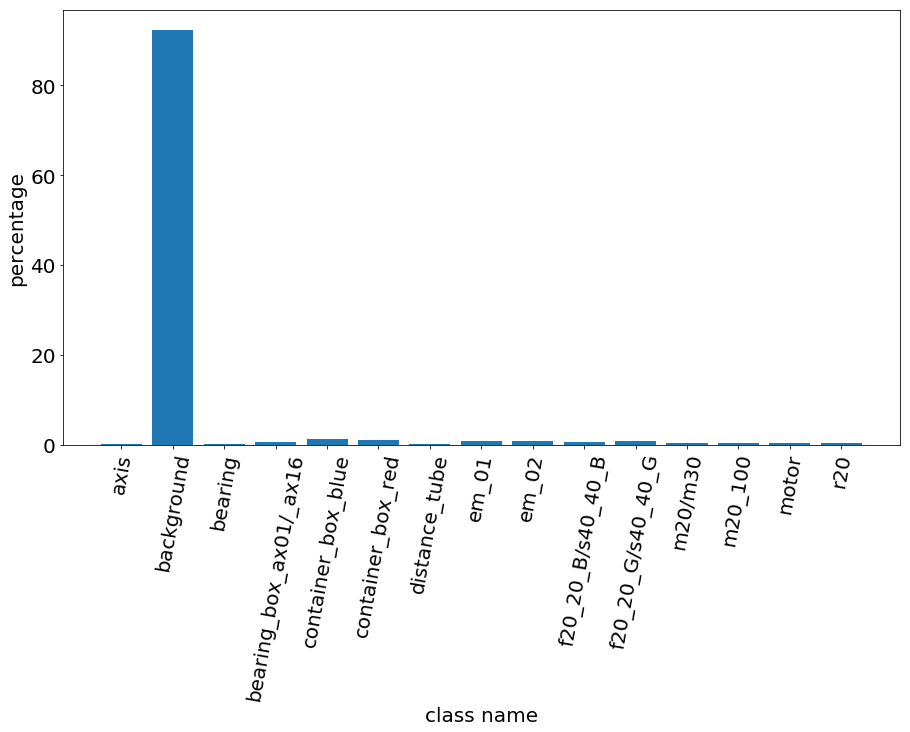

In [6]:
figure = plt.figure(figsize=(15, 8))
plt.bar(cls_to_percentage.keys(), cls_to_percentage.values())
plt.xlabel('class name', fontsize= 20)
plt.ylabel('percentage', fontsize= 20)
plt.xticks(rotation=80)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()